In [1]:
#Import modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Assign the dataset array to an object
winearray=datasets.load_wine()

#Meta data
winearray

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
#Convert the wine array to a pandas df
winedf = pd.DataFrame(data=winearray['data'],
                      columns=winearray['feature_names'])

#and add the class column manually to the df
winedf['class'] = winearray['target'] 
winedf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


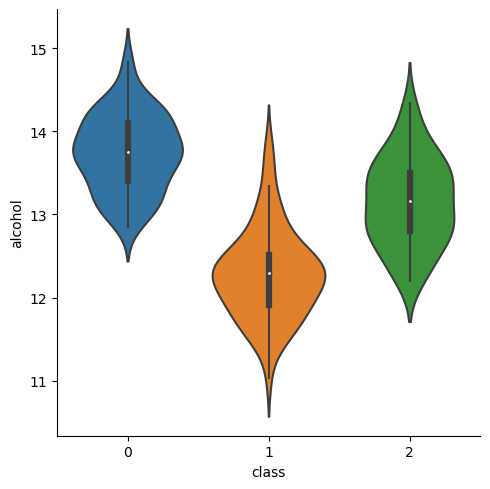

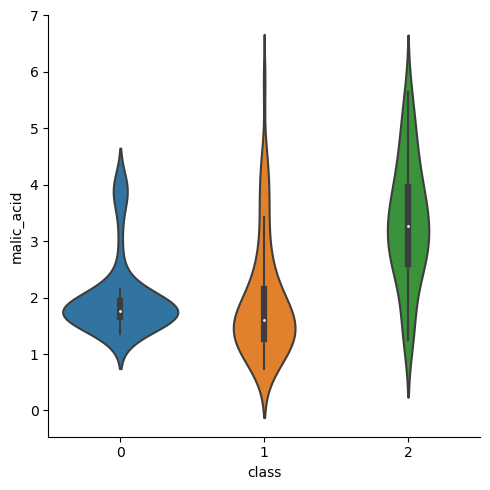

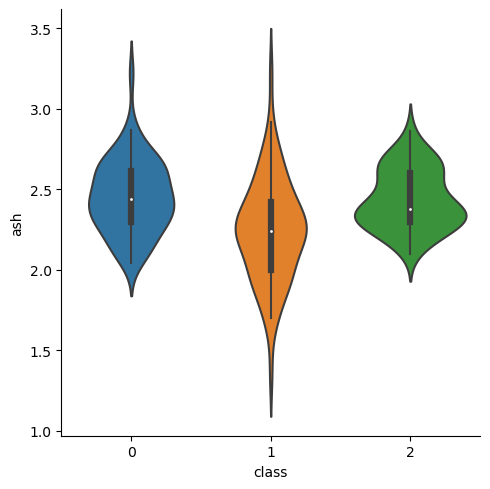

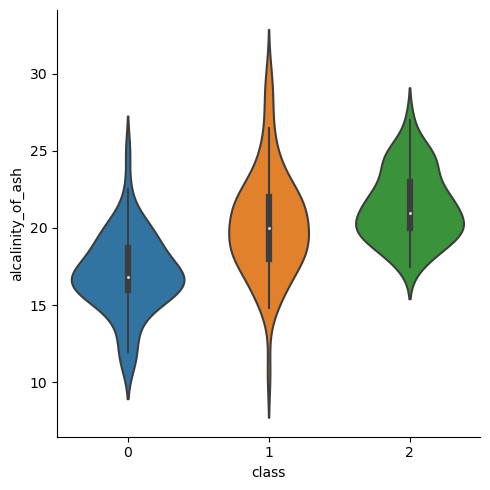

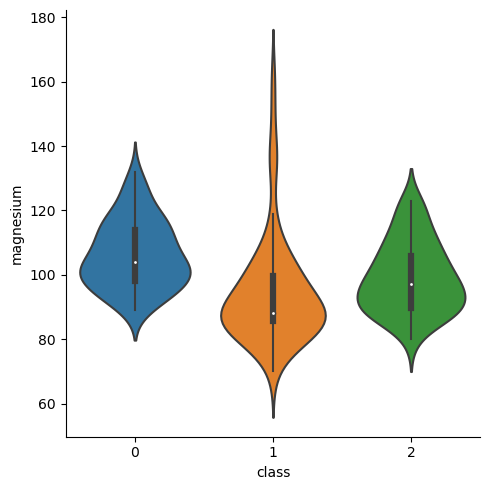

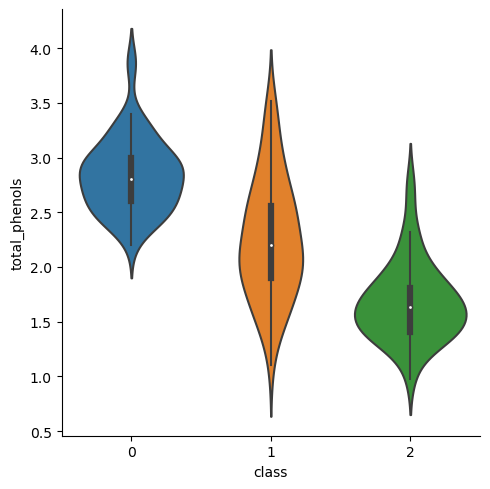

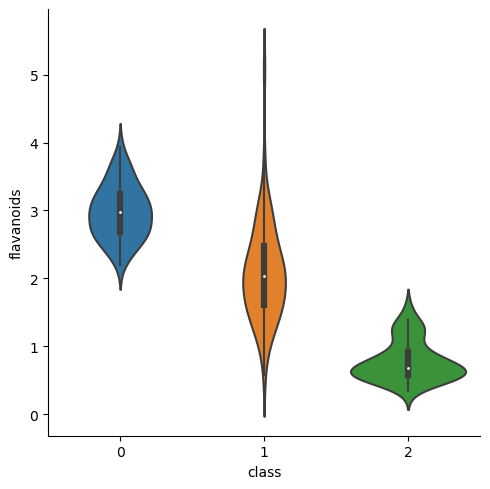

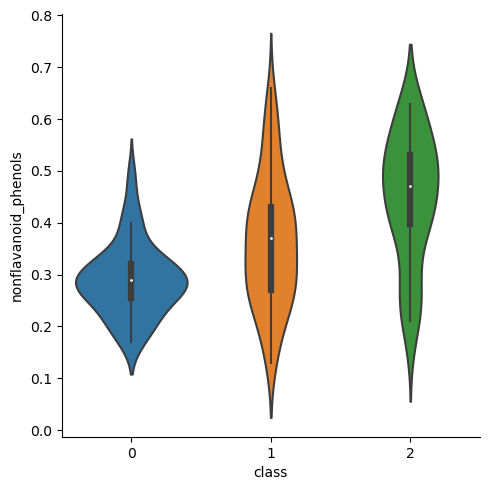

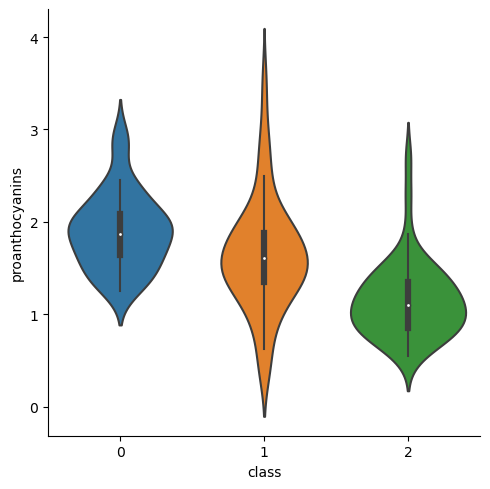

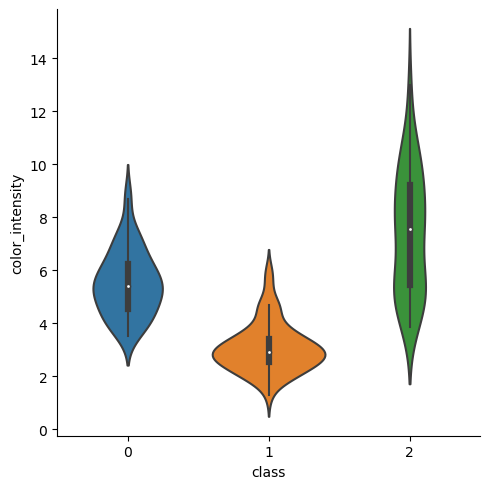

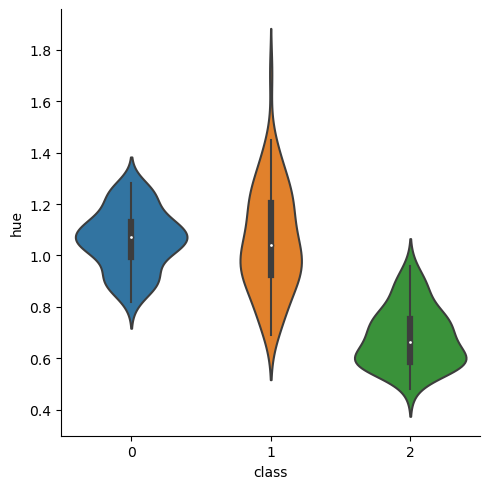

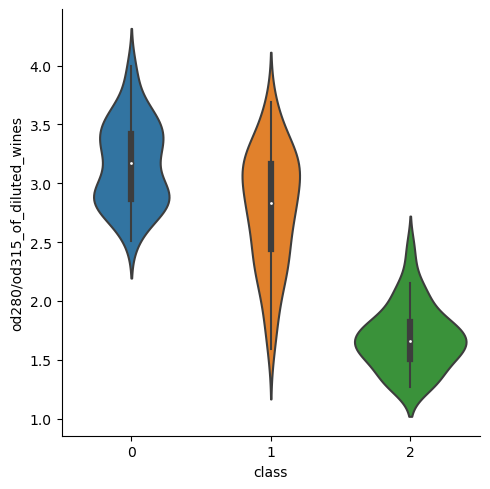

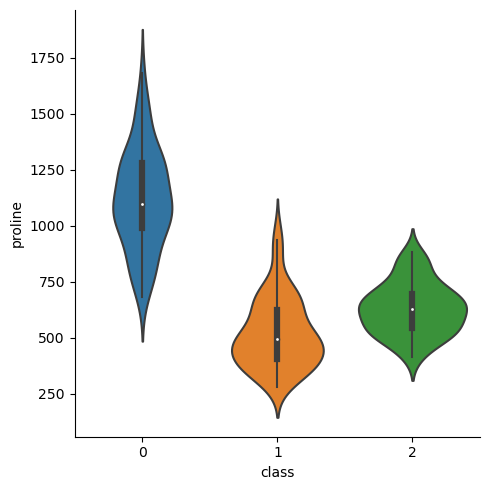

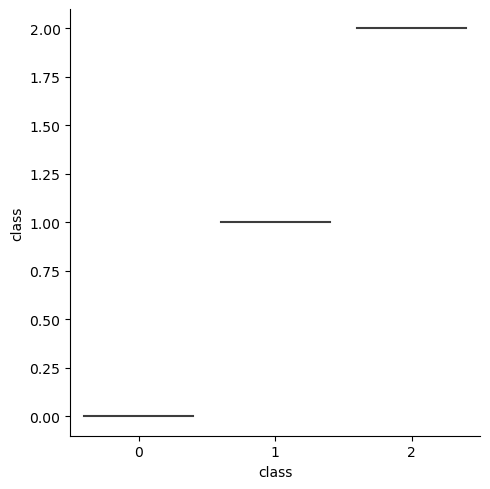

In [4]:
#Visualise the x variables in violin plots
#And remove any recurring warnings that detract from the output
import warnings
warnings.filterwarnings("ignore")

variables = list(winedf.columns.values)

for i in variables:
    sns.catplot(data=winedf, 
                x='class', 
                y=i, 
                kind="violin")

In [5]:
#"Flavanoids" appears to have the greatest distinction between classes

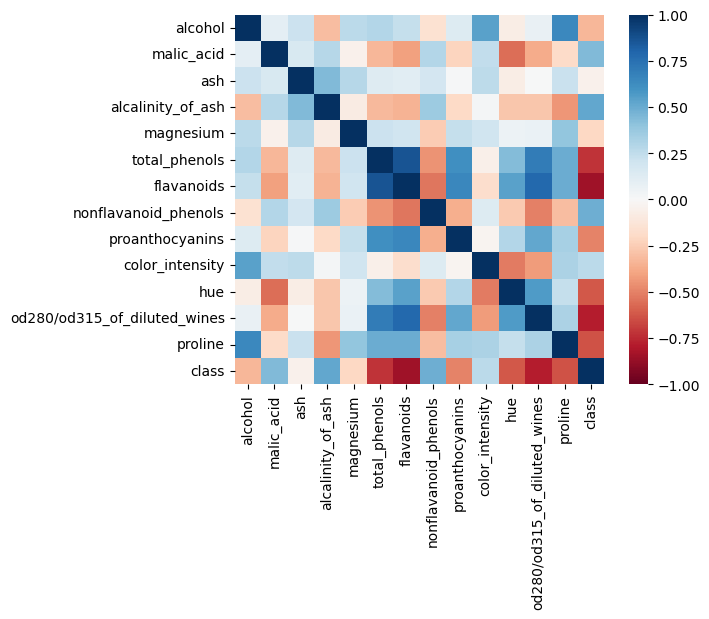

In [6]:
#To confirm this and retrieve a second variable for KNN analysis, correlation analysis will help identify other suitable x variables
#Ignoring variables that would likely be confounding with "flavanoids" 
corr = winedf.corr()
heatmap = sns.heatmap(corr, 
                      vmin=-1.0, 
                      vmax=1.0, 
                      square=True, 
                      cmap="RdBu")

In [7]:
#Create a df to include the variables of interest ("flavanoids") and another unrelated x variable ("colour_intensity")
X = winedf[["flavanoids", 
            "color_intensity"]]
X.head()

,flavanoids,color_intensity
0,3.06,5.64
1,2.76,4.38
2,3.24,5.68
3,3.49,7.80
4,2.69,4.32


In [8]:
#Create an object containing the variable "class"
y = winedf["class"]
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: class, Length: 178, dtype: int32

In [9]:
#Create training and test sets for K nearest neighbours analysis
train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y, 
                                                    random_state=42)

In [10]:
#Finding the optimal n_neighbours value
model = KNeighborsClassifier()

parameters = {
    "n_neighbors" : range(1, 60),
}
clf = GridSearchCV(model, 
                   parameters).fit(train_X, 
                                          train_y)

In [11]:
#Look at results by moving results into a dataframe
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", 
                                     "mean_test_score"])
cv_results.head()[["param_n_neighbors", 
                   "mean_test_score", 
                   "std_test_score", 
                   "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
7,8,0.932479,0.027587,1
9,10,0.932479,0.027587,1
10,11,0.932479,0.027587,1
11,12,0.924786,0.023466,4
12,13,0.924786,0.023466,4


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

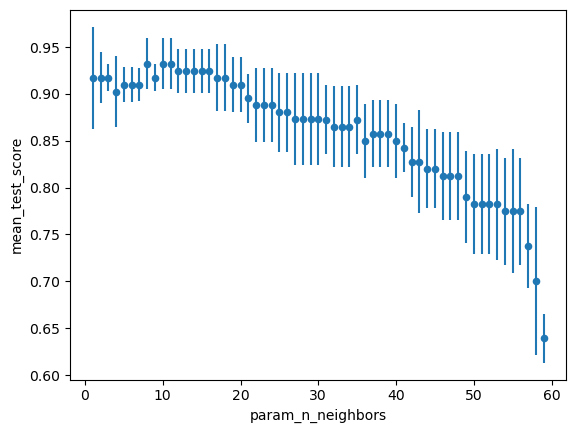

In [12]:
#Plot for visual comparison of n_neighbours scores
cv_results.plot.scatter("param_n_neighbors", 
                        "mean_test_score", 
                        yerr="std_test_score")

In [13]:
#Define a function to visualise how the best n_neighbours model groups the data
def plot_knn(model, 
             X, 
             y, 
             resolution=100, 
             ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, 
                      pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, 
                           x1.max()*1.1 - x1.min()*0.1, 
                           resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, 
                           x2.max()*1.1 - x2.min()*0.1, 
                           resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, 
                                                 x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), 
                               grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, 
                           columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, 
                  grid_x2_values, 
                  y_hat, 
                  cmap="Pastel2", 
                  alpha=1.0, 
                  shading="auto")
    X.plot.scatter(0, 
                   1, 
                   c=y, 
                   colormap="Dark2", 
                   colorbar=False, 
                   alpha=0.8, 
                   ax=ax)

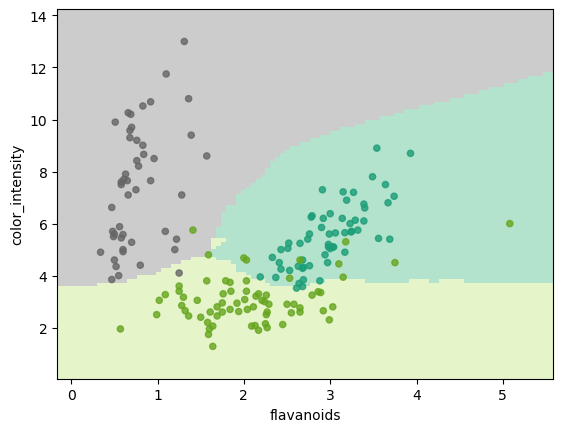

In [14]:
#Plot the model
plot_knn(clf, 
         X, 
         y)

In [15]:
#Model score
clf.score(test_X, 
          test_y)

0.8888888888888888

In [16]:
#Can we find a better model that uses a different x variable but still with 'flavanoids'?
loopdf = winedf.drop(['class', 
                      'color_intensity'], 
                     axis = 1)
variables = list(loopdf.columns.values)
print(loopdf.head())
variables

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins   hue  \
0        3.06                  0.28             2.29  1.04   
1        2.76                  0.26             1.28  1.05   
2        3.24                  0.30             2.81  1.03   
3        3.49                  0.24             2.18  0.86   
4        2.69                  0.39             1.82  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [17]:
#looping all other x varibles with 'flavanoids'
for i in variables:
    X = winedf[["flavanoids", 
                i]]
    y = winedf["class"]
    train_X, test_X, train_y, test_y = train_test_split(X, 
                                                        y, 
                                                        random_state=42)
    model = KNeighborsClassifier()
    parameters = {
        "n_neighbors" : range(1, 60),
    }
    clf = GridSearchCV(model, 
                       parameters).fit(train_X, 
                                       train_y)
    cv_results = DataFrame(clf.cv_results_)
    cv_results = cv_results.sort_values(["rank_test_score", 
                                         "mean_test_score"])
    print(i, 
          clf.score(test_X, 
                       test_y))

alcohol 0.9111111111111111
malic_acid 0.7555555555555555
ash 0.8444444444444444
alcalinity_of_ash 0.8222222222222222
magnesium 0.8222222222222222
total_phenols 0.8
flavanoids 0.7777777777777778
nonflavanoid_phenols 0.6888888888888889
proanthocyanins 0.7555555555555555
hue 0.8
od280/od315_of_diluted_wines 0.8222222222222222
proline 0.6666666666666666


In [ ]:
#Combining alcohol and flavonoids with the optimal n_neighbours gives a model score of 0.9111111111111111 which is > 0.8888888888888888, success!

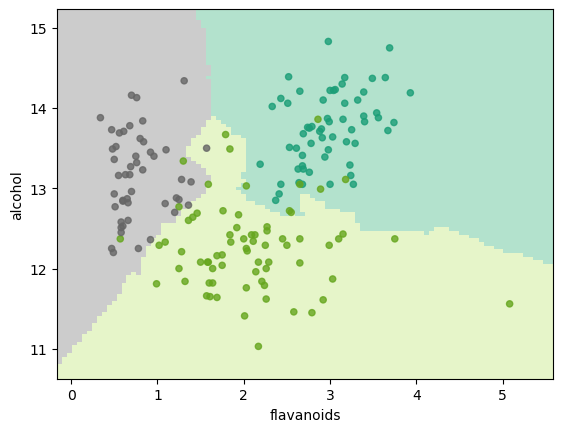

In [18]:
#Plot just to check for overfitting
X = winedf[["flavanoids", 
            "alcohol"]]
X.head()
train_X, test_X, train_y, test_y = train_test_split(X, 
                                                    y, 
                                                    random_state=42)
model = KNeighborsClassifier()

parameters = {
    "n_neighbors" : range(1, 60),
}
clf = GridSearchCV(model, 
                   parameters).fit(train_X, 
                                   train_y)
plot_knn(clf, 
         X, 
         y)